In [ ]:
# qsn: 3

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
import sklearn

In [8]:
# load load_breast_cancer
cancer = sklearn.datasets.load_breast_cancer()
ma= np.where(cancer["feature_names"] == "mean area")[0][0]
mcp = np.where(cancer["feature_names"] == "mean concave points")[0][0]

In [13]:
# normalize (use StandardScaler if you wish)
X_1 = np.asarray([cancer["data"][:,ma], cancer["data"][:,mcp], np.ones(cancer["data"].shape[0])]).T
y_1 = (1.*(cancer["target"]==np.where(cancer["target_names"] == "malignant")[0][0]) +
     -1.*(cancer["target"]==np.where(cancer["target_names"] == "benign")[0][0]))

X,y = X_1.copy()[:,:-1], y_1.copy() 

norm = StandardScaler()
norm.fit(X)

StandardScaler()

In [14]:
# partition with test size 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
# fit logistic regression and draw ROC curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

ns_probs =[0 for _ in range(len(y_test))]


lr_probs = log_reg.predict_log_proba(X_test)
lr_probs= lr_probs[:,1]


#calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

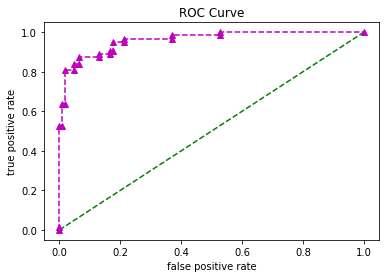

In [20]:
plt.title("ROC Curve")
plt.plot(ns_fpr,ns_tpr,'g--')
plt.plot(lr_fpr,lr_tpr, 'm^--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()